## DS School의 데이터분석 

[DS School](https://dsschool.co.kr)은 직무교육 스타트업으로 데이터 사이언스와 데이터 마케팅 수업을 진행하고 있다.
DS School의 데이터베이스에서 파일을 읽어와 운영, 기획, 마케팅, 재무팀의 요청사항을 분석한 뒤, 그 결과를 전달하는 것이다.

DS School의 마케팅팀은 분석 결과를 바탕으로 사용 플랫폼별 예산을 재조정할 수도 있고, 캠페인별 성과를 비교분석하여 사용자의 니즈를 파악함과 동시에 캠페인별 예산 비중을 조절할 수 있다. 또한, 재무팀은 분석 결과를 바탕으로 매출을 예측할 수 있고 이를 바탕으로 예산안을 작성할 수도 있다.

반면 데이터 분석가(Data Analyst)가 정확한 분석 결과를 전달해주지 못한다면, 마케팅팀은 마케팅 예산을 재조정하는데 실패함으로써 회사의 매출을 감소시킬 수 있다. 운영팀과 기획팀은 매출이 잘 나오지 않는 컨텐츠에 많은 시간과 비용을 투입함으로써 회사에 손해를 안길 것이다. 재무팀은 회사의 앞으로의 재무상황을 잘못 예측함으로써 큰 위기에 빠질 수 있다.

그러므로 데이터를 정확하게 분석하는 것은 무엇보다도 중요하다.


 
* surveys

    DS School 홈페이지에 접속하게 되면 설문조사를 수행하게 되고, 이 결과를 바탕으로 적절한 강의를 선정해 과목 추천한다. 이 때, 수집한 설문조사 내용은 고객의 수요를 조사하는데 아주 소중한 자산이 되고, 강의 내용에 대한 피드백이나 향후 오픈할 강의의 우선순위를 정하는데 쓰일 수 있다.
    
    
 * users
 
    여러가지 마케팅 채널들을 통해서 유입된 고객들에게는 별도의 id가 부여가 된다. 이를 통해 고객의 결제 유무 등을 파악할 수 있고, 이는 마케팅 채널별 효율 분석에 소중한 자산이 된다. mixpanel에서 사용하는 id와 DS School에서 자체적으로 사용하는 데이터베이스의 user id를 연결시켜주는 역할을 하고, 고객에 개인정보를 가지고 있다. 이는 비식별화 되어있음.
    
    
* payments

    유저들의 결제 정보. 연락처와 수강신청한 기수, 결제일, 결제 상태 등이 제공되는데 마찬가지로 개인정보는 비식별화되어있는 상태로 제공. 2018년 이전의 결제 정보가 포함되어 있다.
    

* 믹스패널 데이터

    DS School은 웹로그 데이터 분석을 위해 믹스패널을 사용한다. 2009년 설립된 믹스패널은 사용자 추적을 기본으로 하는 분석 툴로, 원하는 서비스 사용자를 지정하면 해당 유저의 활동을 모두 조회할 수 있는 기능을 제공한다. 이를 통해 해당 사용자 그룹의 특성과 사용 패턴을 알 수 있습니다. 유명 액셀러레이터 ‘Y Combinator’의 멤버로 트위치, 우버, 핏빗, 스포티파이, 세일즈포스 등의 고객사를 보유하고 있으며 2016년 1월 기준 누적 투자액 800억원을 기록함과 동시에 기업 가치 9,000억원대로 평가 받는 분석툴이다. 실시간분석이 가능하며 코호트 분석과 잔존율, 퍼널 분석이 가능하다. 믹스패널 데이터 또한 고객의 유입경로 등의 정보를 가지고 있다. 제공되는 데이터는 믹스패널 데이터베이스에서 추출한 자료이기 때문에 csv파일로 저장되어 있다.

---

In [1]:
import pandas as pd
import sqlite3

In [2]:
pd.options.display.max_columns = 50

In [3]:
connect = sqlite3.connect('./02_transaction/dsschool.db')
connect

In [4]:
query = "SELECT * FROM 'surveys'"

surveys = pd.read_sql(query, connect)

print(surveys.shape)
surveys.head(5)

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356


In [5]:
surveys=surveys.sort_values(['user_id','question_id','created_at'])
surveys.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639


---

Survey 정보를 cleaning

In [6]:
True + True + False

2

In [7]:
"t" + "t"+"f"

'ttf'

In [8]:

for i in range(1,13):
    old_cols=f"answer{i}_selected"
    new_cols=f"answer{i}_selected(bool)"
    surveys[new_cols]=surveys[old_cols]=="t"
surveys.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


In [9]:
surveys.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


In [10]:
surveys['created_at']= pd.to_datetime(surveys['created_at'])
surveys['updated_at']= pd.to_datetime(surveys['updated_at'])


In [11]:
surveys=surveys.drop_duplicates(['user_id','question_id'],keep="last")
surveys.shape

(93481, 29)

---

데이터베이스에서 결제정보를 불러옴. 연락처와 수업정보를 정리.

In [12]:
connect=sqlite3.connect('./02_transaction/dsschool.db')

In [13]:
query = " SELECT * FROM sqlite_master"
pd.read_sql(query,connect)

,type,name,tbl_name,rootpage,sql
0,table,users,users,50,"CREATE TABLE ""users"" (\n""user_id"" TEXT,\n ""mi..."
1,index,ix_users_user_id,users,51,"CREATE INDEX ""ix_users_user_id""ON ""users"" (""us..."
2,table,surveys,surveys,1691,"CREATE TABLE ""surveys"" (\n""survey_id"" TEXT,\n ..."
3,index,ix_surveys_survey_id,surveys,1692,"CREATE INDEX ""ix_surveys_survey_id""ON ""surveys..."
4,table,payments,payments,2,"CREATE TABLE ""payments"" (\n""payment_id"" TEXT,\..."


In [14]:
query=" SELECT * FROM 'payments'"
payments=pd.read_sql(query,connect)
payments

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료
...,...,...,...,...,...,...,...,...,...
932,u2a6g9gcjrm1,이채빈,2gpyqz4dq2ks@dsschool.co.kr,010-4827-5384,2018-01-28 11:17:42,딥러닝 2기,"1,043,000",카드결제,결제 완료
933,56idqm5j9epp,강채민,19q58xllk7dx@dsschool.co.kr,010-5864-1312,2017-12-03 08:42:05,딥러닝 1기,"1,043,000",무통장 입금,결제 완료
934,bhpo6cljk5r3,장재준,fsk6x3ka8dry@dsschool.co.kr,01023520088,2017-12-21 21:52:44,딥러닝 1기,"1,043,000",카드결제,결제 완료
935,8kd7sfv6dcno,고설아,nr6s1313a7ao@dsschool.co.kr,01048686817,2017-11-30 08:44:02,딥러닝 3기,"1,043,000",무통장 입금,결제 완료


개인정보 보호를 위해 연락처 정보는 비식별화 처리된 상태.

In [16]:
valid_phone_number = payments['연락처'].str.contains("^010|\+82")
valid_phone_number

0      True
1      True
2      True
3      True
4      True
       ... 
932    True
933    True
934    True
935    True
936    True
Name: 연락처, Length: 937, dtype: bool

In [17]:
payments['연락처(clean)']= payments["연락처"]

In [18]:
payments.loc[~valid_phone_number,"연락처(clean)"]=pd.np.nan
payments.loc[~valid_phone_number,["연락처","연락처(clean)"]].head()

,연락처,연락처(clean)
176,asdasda,NaN
261,0thed0nonn,NaN
707,123131,NaN
708,16474540316,NaN
843,Mana,NaN


In [19]:
def clean_phone_number(phone_number):
    if pd.isnull(phone_number):
        return pd.np.nan
    if "-" in phone_number:
        return phone_number
    
    else:
        phone_number = phone_number[0:3] + "-" + phone_number[3:7] + '-' + phone_number[7:]
        
        return phone_number
payments['연락처(clean)']=payments['연락처(clean)'].apply(clean_phone_number)
payments['연락처(clean)'].head()

0    010-5600-7186
1    010-5001-5510
2    010-4415-8112
3    010-6577-5220
4    010-6433-3577
Name: 연락처(clean), dtype: object

In [20]:
payments.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료,010-4415-8112
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료,010-6577-5220
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료,010-6433-3577


In [21]:
print('010-1234-5678'.split('-'))

print('입문 속성반 5기'.split())

['010', '1234', '5678']
['입문', '속성반', '5기']


In [22]:
example_list = ['입문', '속성반', '5기']

print(''.join(example_list[1:]))

print('--'.join(example_list[1:]))

속성반5기
속성반--5기


In [23]:
payments['신청수업'].str.split()[2]

['입문반', '22기']

In [24]:
def find_class_type(class_name):
    return class_name.split()[0]

find_class_type("입문반 22기")

'입문반'

In [25]:
def find_class_number(class_name):
    return class_name.split()[1]
find_class_number("입문반 22기")

'22기'

In [26]:
payments['수업타입']=payments['신청수업'].apply(find_class_type)
payments['기수']=payments['신청수업'].apply(find_class_type)

In [27]:
payments[['수업타입','신청수업','기수']]

,수업타입,신청수업,기수
0,입문반,입문반 22기,입문반
1,중급반,중급반 5기,중급반
2,입문반,입문반 22기,입문반
3,입문반,입문반 22기,입문반
4,중급반,중급반 5기,중급반
...,...,...,...
932,딥러닝,딥러닝 2기,딥러닝
933,딥러닝,딥러닝 1기,딥러닝
934,딥러닝,딥러닝 1기,딥러닝
935,딥러닝,딥러닝 3기,딥러닝


In [28]:

payments['신청날짜']=pd.to_datetime(payments['신청날짜'])

In [29]:
payments.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,입문반
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510,중급반,중급반
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료,010-4415-8112,입문반,입문반
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료,010-6577-5220,입문반,입문반
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료,010-6433-3577,중급반,중급반


In [30]:
payments['상태(bool)']=payments['상태']

In [31]:
def find_status(status):
    if "결제 완료" in status:
        return True
    else:
        return False
    
find_status("결제 완료")

True

In [32]:
payments['상태(bool)']=payments['상태'].apply(find_status)

In [33]:
payments['상태(bool)'].unique()

array([ True, False])

---

In [34]:
payments['신청날짜']=pd.to_datetime(payments['신청날짜'])

In [35]:
payments['신청날짜(연)']=payments['신청날짜'].dt.year
payments['신청날짜(월)']=payments['신청날짜'].dt.month
payments['신청날짜(일)']=payments['신청날짜'].dt.day
payments['신청날짜(시)']=payments['신청날짜'].dt.hour
payments['신청날짜(분)']=payments['신청날짜'].dt.minute
payments['신청날짜(초)']=payments['신청날짜'].dt.second
payments['신청날짜(요일)']=payments['신청날짜'].dt.day_name()

In [36]:
payments.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,입문반,True,2018,1,31,15,42,20,Wednesday
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510,중급반,중급반,True,2018,1,31,15,29,24,Wednesday
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료,010-4415-8112,입문반,입문반,True,2018,1,31,14,4,14,Wednesday
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료,010-6577-5220,입문반,입문반,True,2018,1,31,10,18,19,Wednesday
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료,010-6433-3577,중급반,중급반,True,2018,1,30,19,12,54,Tuesday


In [37]:
payments['금액(int)']=payments['금액'].str.replace(",","").astype(int)

In [38]:
cols="신청날짜	신청날짜(연)	신청날짜(월)	신청날짜(일)	신청날짜(시)	신청날짜(분)	신청날짜(초)	신청날짜(요일)	금액	금액(int)"
cols=cols.split("\t")
cols

['신청날짜',
 '신청날짜(연)',
 '신청날짜(월)',
 '신청날짜(일)',
 '신청날짜(시)',
 '신청날짜(분)',
 '신청날짜(초)',
 '신청날짜(요일)',
 '금액',
 '금액(int)']

In [39]:
payments[cols].head()

,신청날짜,신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액,금액(int)
0,2018-01-31 15:42:20,2018,1,31,15,42,20,Wednesday,"495,000",495000
1,2018-01-31 15:29:24,2018,1,31,15,29,24,Wednesday,"594,000",594000
2,2018-01-31 14:04:14,2018,1,31,14,4,14,Wednesday,"495,000",495000
3,2018-01-31 10:18:19,2018,1,31,10,18,19,Wednesday,"495,000",495000
4,2018-01-30 19:12:54,2018,1,30,19,12,54,Tuesday,"594,000",594000


---

결제 데이터를 바탕으로 요일별, 시간별 결제량의 차이.**

DS School에서 주로 사용하고 있는 마케팅 채널인 페이스북은 시간, 요일대별 광고 노출빈도를 조절할 수 있는 기능이 있다. 기존의 결제 패턴을 분석해 결제가 특정 시간대에서 높게 일어난다면 해당 시간대에 더 많은 예산을 사용하는 것이 효율적일 것이다.

In [40]:
table=pd.pivot_table(payments,index='신청날짜(요일)',values="금액(int)",aggfunc=["sum","count"])
table.columns=["sum","count"]
table=table.loc[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]
table


,sum,count
신청날짜(요일),,
Monday,91184000,145
Tuesday,78183000,128
Wednesday,100303000,170
Thursday,102165000,175
Friday,86818000,155
Saturday,44337000,76
Sunday,54212000,88


In [41]:
import matplotlib.pyplot as plt
plt.rc("font",family="Malgun Gothic")
table["sum"].plot()

In [42]:
table2=pd.pivot_table(payments,index="신청날짜(시)",values="금액(int)",aggfunc=["sum","count"])


In [43]:
table2.columns=["sum","count"]
table2


,sum,count
신청날짜(시),,
0,19962000,35
1,9663000,16
2,5699000,9
3,3122000,5
4,4066000,6
5,2033000,3
6,6251000,8
7,5643000,11
8,19188000,28


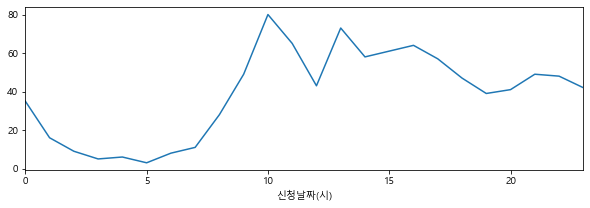

In [44]:
plt.rc("font",family="Malgun Gothic")
table2["count"].plot(figsize=(10,3))

 일별, 시간별 결제금액을 보고 '직장인들이 주로 근무시간에 결제를 결심한다.' 라는 합리적인 가설을 세울 수 있다. 이 가설은 점심시간대인 12시부터 1시 사이에 급격하게 감소하는 것을 통해 더 지지받을 수 있다.

이를 바탕으로 콘텐츠 제작자에게 근무시간에 딴 짓을 하는 직장인들을 타겟팅하는 콘텐츠를 제작해달라고 요청할 수 있다. 또한, 페이스북이 제공하는 광고 시간 타겟팅 기능을 이용하여 근무시간대에 들어가는 광고예산의 비중을 늘릴 수도 있다.


---

 설문조사 데이터에서 답변


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>question_text</th>
      <th>answer1_text</th>
      <th>answer2_text</th>
      <th>answer3_text</th>
      <th>answer4_text</th>
      <th>answer5_text</th>
      <th>answer6_text</th>
      <th>answer7_text</th>
      <th>answer8_text</th>
      <th>answer9_text</th>
      <th>answer10_text</th>
      <th>answer11_text</th>
      <th>answer12_text</th>
    </tr>
    <tr>
      <th>question_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>데이터 사이언스를 배우고 싶은 이유는 무엇인가요?</td>
      <td>현재 다니는 직장에서 즉시 활용할만한 데이터 관련 지식을 습득하기 위해</td>
      <td>데이터와 인공지능 관련 석사/박사로 진학하기 위해</td>
      <td>풀타임 데이터 사이언티스트로 취업/이직을 하기 위해</td>
      <td>기술 창업을 위한 원천기술을 습득하기 위해</td>
      <td>최신 데이터사이언스 트렌드에 관심이 있어서</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>이전까지 수학, 통계학, 프로그래밍에 관한 공부를 얼만큼 하셨나요?</td>
      <td>최근 2~3년간 수학, 통계학 공부를 해 본 적이 없으며, 프로그래밍 역시 해 본 ...</td>
      <td>수학과 통계학은 자신 없지만, 프로그래밍은 조금 해 보았다.</td>
      <td>최근까지 수학과 통계학을 공부해왔지만, 프로그래밍은 해 본 적 없다.</td>
      <td>수학과 통계학을 공부하였으며, 프로그래밍도 할 줄 안다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>데이터 사이언스를 어디에 활용하고 싶으신가요? (복수 선택 가능)</td>
      <td>상품, 컨텐츠 추천 엔진을 구현하고 싶다. (ex: 의류, 영화, 음악 추천 등)</td>
      <td>주가를 분석하고 예측할 수 있는 방법을 알고 싶다. (ex: 주가 등락, 비트코인 ...</td>
      <td>부동산 시세와 그 등락을 예측하고 싶다. (ex: 아파트, 점포, 오피스텔 등)</td>
      <td>텍스트 데이터를 적극 활용해보고 싶다. (ex: 스팸 필터링, 검색 엔진, 법률/판...</td>
      <td>이미지 데이터를 다뤄보고 싶다. (ex: 얼굴 인식, 자동차 표시판 분석 등)</td>
      <td>온라인 커머스에서 판매하는 상품의 재구매율을 늘리고 싶다.</td>
      <td>정기 구독 상품의 구독 이탈률(Churn Rate)을 낮출 수 있는 방법을 알고 싶다.</td>
      <td>마케팅 데이터를 분석하여, 온라인 마케팅의 효율을 높이고 싶다.</td>
      <td>해상사고나 범죄를 분석/예측하여 그 비율을 낮추고 싶다.</td>
      <td>의료 데이터나 신약 분석 등에 활용하고 싶다.</td>
      <td>공공데이터를 활용하는데 도움이 되고 싶다.</td>
      <td>기타</td>
    </tr>
    <tr>
      <th>4</th>
      <td>수강을 하면서 과제를 어느정도까지 완수하실 수 있으신가요?</td>
      <td>현재 하는 일이 바빠서, 과제가 주어지면 전혀 할 수가 없다.</td>
      <td>여가시간을 활용하여 무리하지 않는 선에서 어느정도의 과제는 해결할 수 있다.</td>
      <td>다소 시간이 넉넉하기 때문에 많은 과제가 주어진다고 해도 충분히 완수할 수 있다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5</th>
      <td>DS School의 과정을 마친 후 데이터를 얼만큼 잘 다루고 싶은가요?</td>
      <td>취미로 데이터를 다뤄볼 수 있을 정도면 충분하다.</td>
      <td>대학원 연구실에 가도 뒤쳐지지 않을 만큼 이론과 실전 경험을 쌓고 싶다.</td>
      <td>현재 다니는 회사에서 데이터 관련 업무를 병행할 수 있을 만큼 실력을 쌓고 싶다.</td>
      <td>풀타임 데이터 사이언티스트로 취업/이직할 수 있을 만큼 실력을 쌓고 싶다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>6</th>
      <td>수업은 어느 시간을 선호하시나요? (중복 선택 가능)</td>
      <td>주중 아침</td>
      <td>주중 낮</td>
      <td>주중 저녁</td>
      <td>주말 아침</td>
      <td>주말 낮</td>
      <td>주말 저녁</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>7</th>
      <td>수업을 듣는 기간동안 얼만큼 시간을 할애할 수 있나요?</td>
      <td>현재 하는 일에 지장이 없는 선에서, 파트타임으로 수업을 들을 수 있다.</td>
      <td>현재 하는 일은 쉬는 한이 있더라도, 풀타임으로 수업을 듣고 싶다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>

In [45]:
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

In [46]:
answer_list

['answer1_selected(bool)',
 'answer2_selected(bool)',
 'answer3_selected(bool)',
 'answer4_selected(bool)',
 'answer5_selected(bool)',
 'answer6_selected(bool)',
 'answer7_selected(bool)',
 'answer8_selected(bool)',
 'answer9_selected(bool)',
 'answer10_selected(bool)',
 'answer11_selected(bool)',
 'answer12_selected(bool)']

In [47]:

table3=pd.pivot_table(surveys,index='question_id',values=answer_list)
table3=table3[answer_list]

In [48]:
table3.loc[[1,3]]

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.321978,0.093082,0.238010,0.074705,0.272225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.372238,0.313507,0.211327,0.371489,0.244438,0.215821,0.141958,0.437186,0.103079,0.173421,0.356281,0.12368


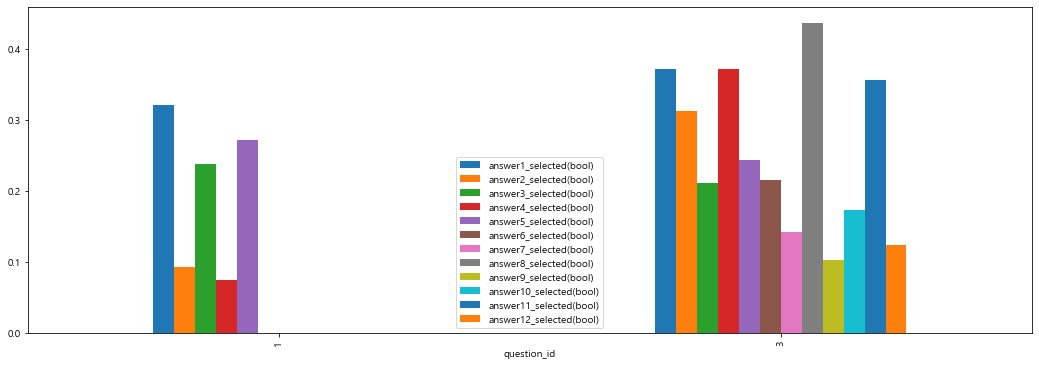

In [49]:
table3.loc[[1,3]].plot.bar(figsize=(18,6))

1번 질문에는 1번 응답 (현재 다니는 직장에서 데이터 사이언스를 활용하기 위해) 가 가장 높은 답변을 받았고, 3번 질문에서는 8번 응답 (마케팅 데이터를 분석하여 마케팅의 효율을 높이고 싶다.)가 가장 높은 응답을 받았다.

하지만, 최종 목표는 결제 유도이기 때문에, 모든 설문조사를 완료한 사람이 아닌 결제를 완료한 사람들의 결과만을 가지고 분석해야 한다. 이를 위해 surveys 테이블과 payments 테이블을 병합할 필요가 있다.

---

In [50]:
query= "SELECT * FROM 'users'"

In [51]:
users=pd.read_sql(query,connect)
users

,user_id,mixpanel_id,payment_id,email
0,2q0ucs4kiiko,DLDEBFOWFZMCIWXRWZZLGULCHTPPYZTDPSTFMZCQUPNNZS...,None,c4l74sjvhybg@dsschool.co.kr
1,n5yxumr8w20w,TCCZWHROYZCUABWOHIXIYDSLKYPQHLUGVYYLTDAQETOEEF...,None,wgkwoep07x26@dsschool.co.kr
2,tjzjbj2awswz,BBRFELKWMCNGYXSFZKPCUXXAAVJZHMDHRZKZKXSDIRDIFS...,None,64elpdsxe0wz@dsschool.co.kr
3,xvt93f37om9q,TKBAYLPGJKWLUGKZQVBJEKKMIZULJIAVUUFBXMZIEPGXGB...,None,hgvkoilokgfq@dsschool.co.kr
4,smsnz99ugq3q,PAAVHVFEYHJZUWNYRDVEXWXXLLVVAWNJDIRSQTQYGXQLAK...,None,5ztx2nzuitjg@dsschool.co.kr
...,...,...,...,...
48025,9vzds77cg8fz,XJPLMQLXNXUDPHCGYTVVFRDLADUDWGYNTXBVECJGZRKPOW...,None,ynr9hk0550pd@dsschool.co.kr
48026,xgg7o1zjq081,SIDNWAXPFQZRGJRQGACYWSAZLUCDIDSQSHROPEORIMSVCY...,None,v5kiojtif1tz@dsschool.co.kr
48027,hnqwt2pb8uy1,MFXRQOKMYNEDJZARRETPLWBIGBLEBOTBYOVCMSKLRPGPZZ...,None,wext32yycbzd@dsschool.co.kr
48028,tvjzctc5uu4n,XKUDTKYJBTMTPTATVJVEHJPSANFXYZFUJWORRRRRYGFKAD...,None,mxdbyd85uowo@dsschool.co.kr


In [52]:
data = payments.merge(users,how="inner")

In [53]:
data=data.merge(surveys,how="inner")

In [54]:
data

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int),user_id,mixpanel_id,email,survey_id,...,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,입문반,True,2018,1,31,15,42,20,Wednesday,495000,fotn6trd7bkr,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,aj6ee0i4u5ak@dsschool.co.kr,jfrzqpcamucg,...,t,f,f,f,None,None,None,None,None,None,None,2018-02-10 14:43:19.367522,2018-02-10 14:43:19.367522,False,True,False,False,False,False,False,False,False,False,False,False
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,입문반,True,2018,1,31,15,42,20,Wednesday,495000,fotn6trd7bkr,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,aj6ee0i4u5ak@dsschool.co.kr,vp2seaski36d,...,f,f,f,None,None,None,None,None,None,None,None,2018-02-10 14:43:31.070015,2018-02-10 14:43:31.070015,True,False,False,False,False,False,False,False,False,False,False,False
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,입문반,True,2018,1,31,15,42,20,Wednesday,495000,fotn6trd7bkr,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,aj6ee0i4u5ak@dsschool.co.kr,t0k3sv3xc3f4,...,f,f,f,t,f,f,f,f,f,f,f,2018-02-10 14:43:50.850659,2018-02-10 14:43:50.850659,False,False,False,False,True,False,False,False,False,False,False,False
3,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,입문반,True,2018,1,31,15,42,20,Wednesday,495000,fotn6trd7bkr,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,aj6ee0i4u5ak@dsschool.co.kr,lqzh61tmwcup,...,f,t,None,None,None,None,None,None,None,None,None,2018-02-10 14:44:01.952076,2018-02-10 14:44:01.952076,False,False,True,False,False,False,False,False,False,False,False,False
4,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,입문반,True,2018,1,31,15,42,20,Wednesday,495000,fotn6trd7bkr,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,aj6ee0i4u5ak@dsschool.co.kr,1p9uk0bkv7jq,...,t,f,f,None,None,None,None,None,None,None,None,2018-02-10 14:44:10.469946,2018-02-10 14:44:10.469946,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,81257426r291,이초민,8rngwwkj48zn@dsschool.co.kr,010-6543-6271,2017-12-25 17:54:57,딥러닝 1기,"1,043,000",카드결제,결제 완료,010-6543-6271,딥러닝,딥러닝,True,2017,12,25,17,54,57,Monday,1043000,eewzza1yfibf,DSAMKHAMUSSOYEWMGZXFGCEUBNMXOXJOQLZNJBYXOBMRAC...,487wah62srkv@dsschool.co.kr,fw8a8ksor5xq,...,t,f,t,t,f,f,f,f,f,f,f,2018-05-22 01:50:53.063278,2018-05-22 01:50:53.063278,False,True,False,True,True,False,False,False,False,False,False,False
4859,81257426r291,이초민,8rngwwkj48zn@dsschool.co.kr,010-6543-6271,2017-12-25 17:54:57,딥러닝 1기,"1,043,000",카드결제,결제 완료,010-6543-6271,딥러닝,딥러닝,True,2017,12,25,17,54,57,Monday,1043000,eewzza1yfibf,DSAMKHAMUSSOYEWMGZXFGCEUBNMXOXJOQLZNJBYXOBMRAC...,487wah62srkv@dsschool.co.kr,i87pwnor45zg,...,f,t,None,None,None,None,None,None,None,None,None,2018-05-22 01:50:58.865421,2018-05-22 01:50:58.865421,False,False,True,False,False,False,False,False,False,False,False,False
4860,812574

---

In [55]:
users.columns

Index(['user_id', 'mixpanel_id', 'payment_id', 'email'], dtype='object')

In [56]:
surveys.columns

Index(['survey_id', 'user_id', 'question_id', 'answer1_selected',
       'answer2_selected', 'answer3_selected', 'answer4_selected',
       'answer5_selected', 'answer6_selected', 'answer7_selected',
       'answer8_selected', 'answer9_selected', 'answer10_selected',
       'answer11_selected', 'answer12_selected', 'created_at', 'updated_at',
       'answer1_selected(bool)', 'answer2_selected(bool)',
       'answer3_selected(bool)', 'answer4_selected(bool)',
       'answer5_selected(bool)', 'answer6_selected(bool)',
       'answer7_selected(bool)', 'answer8_selected(bool)',
       'answer9_selected(bool)', 'answer10_selected(bool)',
       'answer11_selected(bool)', 'answer12_selected(bool)'],
      dtype='object')

In [58]:
query="""SELECT *
         FROM 'payments' 
         INNER JOIN 'users' ON payments.이메일=users.email 
         INNER JOIN 'surveys' ON users.user_id=surveys.user_id
"""

In [59]:
pd.read_sql(query,connect)

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,user_id,mixpanel_id,payment_id,email,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,5vtq11wow61w,한서훈,3xy4zzr6k13x@dsschool.co.kr,01040513577,2018-01-03 14:44:12,입문반 19기,"495,000",카드결제,결제 완료,orqcrchp0s2a,OJRXJURAXLJMMAWURTWSNBUJIRJJIVSHDHBBBPORBVRPPQ...,None,3xy4zzr6k13x@dsschool.co.kr,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,209h7wqy7bdf,김재호,ao6kez00wxnh@dsschool.co.kr,010-6880-0251,2017-10-22 08:53:29,입문반 11기,"495,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152
2,uh701zm4irgx,김재호,ao6kez00wxnh@dsschool.co.kr,010-7202-2433,2017-12-21 16:47:00,딥러닝 2기,"1,043,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152
3,8vpohybxjxld,이민국,nd5i4157vo2k@dsschool.co.kr,010-6215-4832,2018-01-20 13:18:45,딥러닝 2기,"1,043,000",카드결제,결제 완료,dcnz8pmph34i,NDMOCEUGYGEAWKWDEKHSNBYRXNQJAEEESMIQUNVYYHFKJI...,None,nd5i4157vo2k@dsschool.co.kr,c4ir6lwzgkd4,dcnz8pmph34i,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-19 02:43:44.446664,2018-01-19 02:43:44.446664
4,x6n32merwsyv,이민국,nd5i4157vo2k@dsschool.co.kr,010-7681-3527,2018-01-19 13:31:11,입문반 21기,"495,000",카드결제,결제 완료,dcnz8pmph34i,NDMOCEUGYGEAWKWDEKHSNBYRXNQJAEEESMIQUNVYYHFKJI...,None,nd5i4157vo2k@dsschool.co.kr,c4ir6lwzgkd4,dcnz8pmph34i,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-19 02:43:44.446664,2018-01-19 02:43:44.446664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,a4lj6bjzo3tq,권채민,va7d8fgmxsxf@dsschool.co.kr,01020207048,2017-10-19 22:41:55,입문반 12기,"495,000",카드결제,결제 완료,yxj5d6auhsgg,ILKHOMXQMTEVHZRZLJTTOHCLINYBQMVPRKBXCPSTQHNZEQ...,None,va7d8fgmxsxf@dsschool.co.kr,ov0e9e0snxx7,yxj5d6auhsgg,3,t,f,f,f,f,f,t,t,f,f,f,f,2018-07-10 07:47:33.203236,2018-07-10 07:47:33.203236
3880,ap21g14jnct9,권채민,va7d8fgmxsxf@dsschool.co.kr,01084623801,2017-11-26 21:08:34,중급반 4기,"594,000",카드결제,결제 완료,yxj5d6auhsgg,ILKHOMXQMTEVHZRZLJTTOHCLINYBQMVPRKBXCPSTQHNZEQ...,None,va7d8fgmxsxf@dsschool.co.kr,ov0e9e0snxx7,yxj5d6auhsgg,3,t,f,f,f,f,f,t,t,f,f,f,f,2018-07-10 07:47:33.203236,2018-07-10 07:47:33.203236
3881,37jpqq7mf8ff,권채민,va7d8fgmxsxf@dsschool.co.kr,01008031377,2017-11-26 21:12:31,딥러닝 2기,"1,043,000",카드결제,결제 완료,yxj5d6auhsgg,ILKHOMXQMTEVHZRZLJTTOHCLINYBQMVPRKBXCPSTQHNZEQ...,None,va7d8fgmxsxf@dsschool.co.kr,vhh8bgfygkyo,yxj5d6auhsgg,7,t,f,None,None,None,None,None,None,None,None,None,None,2018-07-10 07:47:47.297260,2018-07-10 07:47:47.297260
3882,a4lj6bjzo3tq,권채민,va7d8fgmxsxf@dsschool.co.kr,01020207048,2017-10-19 22:41:55,입문반 12기,"495,000",카드결제,결제 완료,yxj5d6auhsgg,ILKHOMXQMTEVHZRZLJTTOHCLINYBQMVPRKBXCPSTQHNZEQ...,None,va7d8fgmxsxf@dsschool.co.kr,vhh8bgfygkyo,yxj5d6auhsgg,7,t,f,None,None,None,None,None,None,None,None,None,None,2018-07-10 07:47:47.297260,2018-07-10 07:47:47.297260


In [64]:
# pandas merge와 sql join 이 결과가 다른이유
# pandas는 중복을 제거했고
# sql 데이터는 중복을 제거하지 않았다

In [65]:
selected_columns = ['user_id',  '이름', '연락처(clean)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜', '상태(bool)', 'mixpanel_id']

selected_columns += [
    'question_id',
    'answer1_selected(bool)', 'answer2_selected(bool)', 'answer3_selected(bool)',
    'answer4_selected(bool)', 'answer5_selected(bool)', 'answer6_selected(bool)',
    'answer7_selected(bool)', 'answer8_selected(bool)', 'answer9_selected(bool)',
    'answer10_selected(bool)', 'answer11_selected(bool)', 'answer12_selected(bool)'
]

selected_columns += [
    'created_at', 'updated_at'
]
data=data[selected_columns]

In [66]:
data

,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
0,fotn6trd7bkr,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,1,False,True,False,False,False,False,False,False,False,False,False,False,2018-02-10 14:43:19.367522,2018-02-10 14:43:19.367522
1,fotn6trd7bkr,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-02-10 14:43:31.070015,2018-02-10 14:43:31.070015
2,fotn6trd7bkr,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,3,False,False,False,False,True,False,False,False,False,False,False,False,2018-02-10 14:43:50.850659,2018-02-10 14:43:50.850659
3,fotn6trd7bkr,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,4,False,False,True,False,False,False,False,False,False,False,False,False,2018-02-10 14:44:01.952076,2018-02-10 14:44:01.952076
4,fotn6trd7bkr,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,5,False,True,False,False,False,False,False,False,False,False,False,False,2018-02-10 14:44:10.469946,2018-02-10 14:44:10.469946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,eewzza1yfibf,이초민,010-6543-6271,8rngwwkj48zn@dsschool.co.kr,딥러닝 1기,1043000,카드결제,2017-12-25 17:54:57,True,DSAMKHAMUSSOYEWMGZXFGCEUBNMXOXJOQLZNJBYXOBMRAC...,3,False,True,False,True,True,False,False,False,False,False,False,False,2018-05-22 01:50:53.063278,2018-05-22 01:50:53.063278
4859,eewzza1yfibf,이초민,010-6543-6271,8rngwwkj48zn@dsschool.co.kr,딥러닝 1기,1043000,카드결제,2017-12-25 17:54:57,True,DSAMKHAMUSSOYEWMGZXFGCEUBNMXOXJOQLZNJBYXOBMRAC...,4,False,False,True,False,False,False,False,False,False,False,False,False,2018-05-22 01:50:58.865421,2018-05-22 01:50:58.865421
4860,eewzza1yfibf,이초민,010-6543-6271,8rngwwkj48zn@dsschool.co.kr,딥러닝 1기,1043000,카드결제,2017-12-25 17:54:57,True,DSAMKHAMUSSOYEWMGZXFGCEUBNMXOXJOQLZNJBYXOBMRAC...,5,False,False,True,False,False,False,False,False,False,False,False,False,2018-05-22 01:51:05.979641,2018-05-22 01:51:05.979641
4861,eewzza1yfibf,이초민,010-6543-6271,8rngwwkj48zn@dsschool.co.kr,딥러닝 1기,1043000,카드결제,2017-12-25 17:54:57,True,DSAMKHAMUSSOYEWMGZXFGCEUBNMXOXJOQLZNJBYXOBMRAC...,6,True,True,True,True,True,True,False,False,False,False,False,False,2018-05-22 01:51:10.129787,2018-05-22 01:51:10.129787


사용하고 있는 데이터는 payments_complete와 surveys를 병합한 데이터로 전부 결제를 완료한 사람들의 설문조사 데이터이다. 하지만, 결제를 한 이후에도 설문조사를 한 경우 있고 한 사람이 여러번 설문조사를 한 경우가 있는데 결제를 한 이후에도 설문조사를 한 경우는 삭제하고 여러번 설문조사를 한 경우는 첫번째 설문 조사만 남기고 중복정보도 제거해주어야 한다.


In [67]:
data = data.drop_duplicates(["이메일", "question_id", "created_at"],keep="last")


In [68]:
data

,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
0,fotn6trd7bkr,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,1,False,True,False,False,False,False,False,False,False,False,False,False,2018-02-10 14:43:19.367522,2018-02-10 14:43:19.367522
1,fotn6trd7bkr,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-02-10 14:43:31.070015,2018-02-10 14:43:31.070015
2,fotn6trd7bkr,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,3,False,False,False,False,True,False,False,False,False,False,False,False,2018-02-10 14:43:50.850659,2018-02-10 14:43:50.850659
3,fotn6trd7bkr,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,4,False,False,True,False,False,False,False,False,False,False,False,False,2018-02-10 14:44:01.952076,2018-02-10 14:44:01.952076
4,fotn6trd7bkr,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,5,False,True,False,False,False,False,False,False,False,False,False,False,2018-02-10 14:44:10.469946,2018-02-10 14:44:10.469946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,eewzza1yfibf,이초민,010-6543-6271,8rngwwkj48zn@dsschool.co.kr,딥러닝 1기,1043000,카드결제,2017-12-25 17:54:57,True,DSAMKHAMUSSOYEWMGZXFGCEUBNMXOXJOQLZNJBYXOBMRAC...,3,False,True,False,True,True,False,False,False,False,False,False,False,2018-05-22 01:50:53.063278,2018-05-22 01:50:53.063278
4859,eewzza1yfibf,이초민,010-6543-6271,8rngwwkj48zn@dsschool.co.kr,딥러닝 1기,1043000,카드결제,2017-12-25 17:54:57,True,DSAMKHAMUSSOYEWMGZXFGCEUBNMXOXJOQLZNJBYXOBMRAC...,4,False,False,True,False,False,False,False,False,False,False,False,False,2018-05-22 01:50:58.865421,2018-05-22 01:50:58.865421
4860,eewzza1yfibf,이초민,010-6543-6271,8rngwwkj48zn@dsschool.co.kr,딥러닝 1기,1043000,카드결제,2017-12-25 17:54:57,True,DSAMKHAMUSSOYEWMGZXFGCEUBNMXOXJOQLZNJBYXOBMRAC...,5,False,False,True,False,False,False,False,False,False,False,False,False,2018-05-22 01:51:05.979641,2018-05-22 01:51:05.979641
4861,eewzza1yfibf,이초민,010-6543-6271,8rngwwkj48zn@dsschool.co.kr,딥러닝 1기,1043000,카드결제,2017-12-25 17:54:57,True,DSAMKHAMUSSOYEWMGZXFGCEUBNMXOXJOQLZNJBYXOBMRAC...,6,True,True,True,True,True,True,False,False,False,False,False,False,2018-05-22 01:51:10.129787,2018-05-22 01:51:10.129787


In [69]:
data2 =data.set_index('question_id')

In [70]:
data2.head(1)

,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
question_id,,,,,,,,,,,,,,,,,,,,,,,,
1,fotn6trd7bkr,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,UPRBHQEPJKRIFPIIPFZIGIQRANJIIBTRXMPURHLHKFLDBC...,False,True,False,False,False,False,False,False,False,False,False,False,2018-02-10 14:43:19.367522,2018-02-10 14:43:19.367522


In [71]:
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]


In [72]:
answer_list

['answer1_selected(bool)',
 'answer2_selected(bool)',
 'answer3_selected(bool)',
 'answer4_selected(bool)',
 'answer5_selected(bool)',
 'answer6_selected(bool)',
 'answer7_selected(bool)',
 'answer8_selected(bool)',
 'answer9_selected(bool)',
 'answer10_selected(bool)',
 'answer11_selected(bool)',
 'answer12_selected(bool)']

In [73]:
data_table=pd.pivot_table(data2,index='question_id',values=answer_list)
data_table

,answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool)
question_id,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.328551,0.078910,0.265423,0.058824,0.268293,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.537464,0.242075,0.106628,0.113833,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.179856,0.338129,0.113669,0.352518,0.296403,0.204317,0.343885,0.237410,0.22446,0.159712,0.427338,0.076259
4,0.000000,0.000000,0.000000,0.074820,0.664748,0.260432,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.087770,0.158273,0.388489,0.365468,0.000000,0.00000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.217266,0.263309,0.487770,0.464748,0.559712,0.45036,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.736994,0.263006,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [74]:
cols="answer1_selected(bool)	answer2_selected(bool)	answer3_selected(bool)	answer4_selected(bool)	answer5_selected(bool)	answer6_selected(bool)	answer7_selected(bool)	answer8_selected(bool)	answer9_selected(bool)	answer10_selected(bool)	answer11_selected(bool)	answer12_selected(bool)"
cols=cols.split('\t')
cols

['answer1_selected(bool)',
 'answer2_selected(bool)',
 'answer3_selected(bool)',
 'answer4_selected(bool)',
 'answer5_selected(bool)',
 'answer6_selected(bool)',
 'answer7_selected(bool)',
 'answer8_selected(bool)',
 'answer9_selected(bool)',
 'answer10_selected(bool)',
 'answer11_selected(bool)',
 'answer12_selected(bool)']

In [76]:
data_table.loc[[1,3]][cols]

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.328551,0.078910,0.265423,0.058824,0.268293,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.352518,0.296403,0.204317,0.343885,0.237410,0.22446,0.159712,0.427338,0.076259,0.179856,0.338129,0.113669


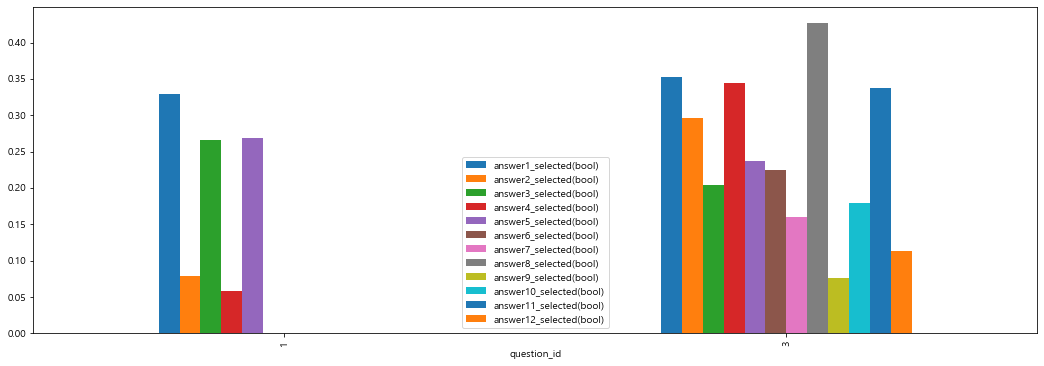

In [77]:
%matplotlib inline

data_table.loc[[1,3]][cols].plot.bar(figsize=(18,6))

모든 설문조사 결과와 결제한 사람들의 설문조사 결과는 상당히 비슷한 양상을 보인다. 그런데, 1번 질문의 5번 응답 '최신 데이터사이언스 트렌드에 관심이 있어서' 응답을 한 경우는 결제율이 낮다는 것을 알 수 있다. 

아무래도 고가의 강의이다 보니, 관심만 있는 정도로는 구매로의 전환이 쉽게 일어나지 않는다.
1번 응답 (현재 다니는 직장에서 데이터 사이언스를 활용하기 위해)의 비율이 압도적으로 높고, 두 번째는 전업 데이터 사이언티스트로 이직/전직하기이다. 

모든 사람을 대상 설문조사 결과와 결제자 대상 설문조사 결과를 3번 질문에서도 비교해 봤을 때, 응답 8번 또한 눈에 띄게 줄어든 것을 확인할 수 있다. 8번의 응답은 '마케팅 데이터를 분석하여 마케팅의 효율을 높이기' 이다. 이를 바탕으로 마케팅에 관심이 있는 사람들은 데이터 마케팅 강의로 이탈하거나 사이언스 강의를 수강하지 않는다고 생각할 수 있다. 

현재 설문조사 결과를 종합해봤을 떄, 직장에서 업무에 데이터 사이언스를 활용하면서 '추천 시스템'을 만들거나 텍스트 데이터를 다루는 것에 대한 수요가 매우 높음을 확인할 수 있다.


In [101]:
data[['created_at','신청날짜']].head()

,created_at,신청날짜
0,2018-02-10 14:43:19.367522,2018-01-31 15:42:20
1,2018-02-10 14:43:31.070015,2018-01-31 15:42:20
2,2018-02-10 14:43:50.850659,2018-01-31 15:42:20
3,2018-02-10 14:44:01.952076,2018-01-31 15:42:20
4,2018-02-10 14:44:10.469946,2018-01-31 15:42:20


In [102]:
data[data['신청날짜']>data['created_at']].head()

,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at,time
35,axrggpub4v9u,허성진,010-6433-3577,bqnkbpsk457a@dsschool.co.kr,중급반 5기,594000,카드결제,2018-01-30 19:12:54,True,WEGNTGMYHTNKKXIQGLSPHZMFALEUHHVNALMVKBXXTWIFCQ...,1,False,False,False,False,True,False,False,False,False,False,False,False,2018-01-05 23:18:05.529516,2018-01-05 23:18:05.529516,24 days 19:54:48.470484
36,axrggpub4v9u,허성진,010-6433-3577,bqnkbpsk457a@dsschool.co.kr,중급반 5기,594000,카드결제,2018-01-30 19:12:54,True,WEGNTGMYHTNKKXIQGLSPHZMFALEUHHVNALMVKBXXTWIFCQ...,2,False,True,False,False,False,False,False,False,False,False,False,False,2018-01-05 23:18:14.944889,2018-01-05 23:18:14.944889,24 days 19:54:39.055111
37,axrggpub4v9u,허성진,010-6433-3577,bqnkbpsk457a@dsschool.co.kr,중급반 5기,594000,카드결제,2018-01-30 19:12:54,True,WEGNTGMYHTNKKXIQGLSPHZMFALEUHHVNALMVKBXXTWIFCQ...,3,False,True,True,False,False,False,False,False,True,False,True,False,2018-01-05 23:18:37.027776,2018-01-05 23:18:37.027776,24 days 19:54:16.972224
38,axrggpub4v9u,허성진,010-6433-3577,bqnkbpsk457a@dsschool.co.kr,중급반 5기,594000,카드결제,2018-01-30 19:12:54,True,WEGNTGMYHTNKKXIQGLSPHZMFALEUHHVNALMVKBXXTWIFCQ...,4,False,True,False,False,False,False,False,False,False,False,False,False,2018-01-05 23:18:45.293383,2018-01-05 23:18:45.293383,24 days 19:54:08.706617
39,axrggpub4v9u,허성진,010-6433-3577,bqnkbpsk457a@dsschool.co.kr,중급반 5기,594000,카드결제,2018-01-30 19:12:54,True,WEGNTGMYHTNKKXIQGLSPHZMFALEUHHVNALMVKBXXTWIFCQ...,5,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-05 23:18:53.597225,2018-01-05 23:18:53.597225,24 days 19:54:00.402775


In [103]:
time = data['신청날짜'] - data['created_at']
time.head()

0   -10 days +00:59:00.632478
1   -10 days +00:58:48.929985
2   -10 days +00:58:29.149341
3   -10 days +00:58:18.047924
4   -10 days +00:58:09.530054
dtype: timedelta64[ns]

In [104]:
time.dt.components.head(2)

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,-10,0,59,0,632,478,0
1,-10,0,58,48,929,985,0


In [105]:
time_int = \
time.dt.components['days'] + time.dt.components['hours'] / 24 + time.dt.components['minutes'] / (24*60) + time.dt.components['seconds'] / (24 * 60 * 60)

time_int.head()

0   -9.959028
1   -9.959167
2   -9.959387
3   -9.959514
4   -9.959618
dtype: float64

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

(0, 25)

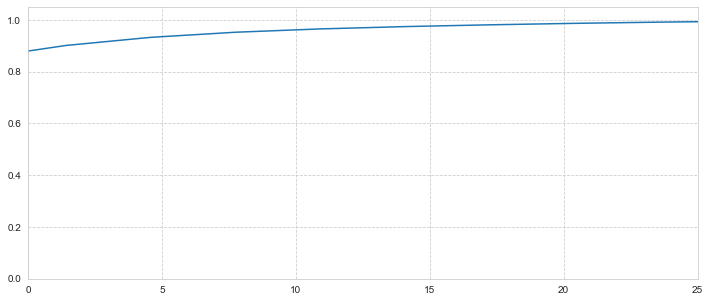

In [107]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize=[12,5])
ax = sns.distplot(time_int,
                  hist=False,
                  #hist_kws=dict(cumulative=True),
                  kde_kws={'cumulative' : True})


ax.set_xlim(0, 25)

위의 분포를 통해 결제를 한 사람들 중 80% 이상이 10일 이내 결제, 그리고 나머지 20%는 훨씬 많은 고민을 한다는 것을 파악할 수 있=다. 이를 통해 DS School에 관심을 가졌지만 아직 결제를 하지 않은 잠재고객들의 결제 가능성을 역으로 추정해 리타겟팅 전략의 예산 분배를 진행할 수 있다. 


 마케팅 캠페인별 효율을 믹스패널 데이터를 이용해 비교분석. 마케팅을 진행할 때, 사후분석을 위해 링크에 utm 파라미터들을 추가한다.utm_campaign 파라미터에 캠페인 별로 값을 입력해놓으면 유입된 사용자를 캠페인 별로 추적하는 것이 가능해진다.




In [121]:
mixpanel_data=pd.read_csv('./02_transaction/mixpanel_people_profiles_revised.csv')
mixpanel_data


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id
0,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-16T22:00:21,iOS,Facebook Mobile,Seoul,KR,VGGPBLBXCDGZOSCVCODTNZBICKURLVAFKASUMZCNZQHEIU...
1,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-19T19:03:36,iOS,Mobile Safari,Incheon,KR,TIKFTLTMQQLYMKSDPCFCPNSOLHKLOQWQMIMKXBRUPVKEOD...
2,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-21T23:34:02,Windows,Firefox,Seoul,KR,WMFONVUFEIFDJOOZWJHPMTRKPDMKHPDBQSYKYTACHVODOL...
3,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T07:43:58,iOS,Facebook Mobile,Seoul,KR,DYXLHORZUNPSZSEXOIRNGCZWMEHHNKCTACJOFEEWEAFYVX...
4,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T15:03:48,Android,Chrome,Seoul,KR,BRQEHDPQRESBAIAURZIPTHTPDMJZSBBNACVCNMQFGXVXIP...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17897,NaN,NaN,m.facebook.com,$none,NaN,$none,NaN,$none,NaN,$none,NaN,$none,NaN,http://m.facebook.com/,2018-07-26T10:30:07,Android,Chrome,Seoul,KR,OIGURSMTDBVKWMTRPNAJEWUXTRSGVNWIVKZWTYFBJTPWER...
17898,NaN,NaN,m.facebook.com,$none,NaN,$none,NaN,$none,NaN,$none,NaN,$none,NaN,http://m.facebook.com/,2018-07-29T15:07:42,Android,Chrome,Seoul,KR,BKIAGBPQTRDEGUNHQKMCMVDHIVXZBBCVIZFZAARHRRIQMW...
17899,입문 과정 46기,2018-07-31T22:40:41,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2018-07-31T22:43:22,iOS,Mobile Safari,Hongseong,KR,BCCOVNESVRZHTJMGZCHCSZHMRIVALEMNPYGNARHPHUZNQV...
17900,NaN,NaN,instagram.com,kakaoj,kakaoj,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://instagram.com/,2018-08-02T03:33:47,Android,Chrome,Bellingham,US,THGERNHLZNXONYTDHPLEWVIJKYGYVFZXWUCVBSRZYWOLLL...


In [122]:
mixpanel_payments = (
    mixpanel_data.merge(users, how='inner', left_on='distinct_id', right_on='mixpanel_id')
                 .merge(payments, how='left', on='payment_id')
)    
print(mixpanel_payments.shape)
print(mixpanel_data.shape)

mixpanel_payments.head()

(13875, 44)
(17902, 20)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
0,NaN,2017-09-01T09:27:57,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-01T09:30:07,Android,Chrome,Seoul,KR,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,j81umpsxbqer,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,None,xgyd2m7cz1tz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2017-09-25T11:08:25,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-25T11:08:33,Windows,Chrome,Seoul,KR,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,gc3riqbpec5a,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,None,ww4rloe4l6to@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2017-11-27T16:59:25,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-11-27T16:59:36,iOS,Facebook Mobile,Seoul,KR,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,h47v07u6u5zm,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,None,i97zkjstv1mz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-11-30T15:44:16,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-11-30T15:44:27,Windows,Internet Explorer,Suwon-si,KR,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,v6ln67rwsqo4,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,86dpwpocr5gi,w2gcxxhaam4s@dsschool.co.kr,이초현,g8zyxqrdgcgf@dsschool.co.kr,01088615300,2017-12-17 09:26:56,중급반 4기,"594,000",카드결제,결제 완료,010-8861-5300,중급반,중급반,True,2017.0,12.0,17.0,9.0,26.0,56.0,Sunday,594000.0
4,NaN,2018-01-01T16:03:02,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2018-01-01T16:03:09,Windows,Chrome,Seoul,KR,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,mbwhfxfmmowu,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,None,rnippqcfcr09@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


믹스패널 데이터를 바탕으로 캠페인별 유입 id의 수에 비해 결제 비율이 가장 높은 광고 캠페인을 찾는다

직접 접속한 고객들도 있고, 개인정보 보호 브라우저 등을 사용하는 고객들로 인해 항상 유입 경로를 추적하는게 가능하지는 않다.

`utm_campaign [first touch]`의 경우 해당 고객이 '처음'으로 유입된 캠페인이 무엇인지에 대한 정보이다. 해당 컬럼이 비어있지 않은 데이터만 남기고, 피벗 테이블을 이용해 `utm_campaign [first touch]`별 실제 결제 비율을 구한다.

In [123]:
mixpanel_payments = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].notnull()]

In [125]:
#평균을 단순하게 mean으로 연산하기 위해 bool 타입 데이터를 정수형으로 변환해줍니다.
mixpanel_payments.loc[mixpanel_payments['상태(bool)'] == True, '상태(bool)'] = 1
mixpanel_payments.loc[mixpanel_payments['상태(bool)'] != True, '상태(bool)'] = 0

In [126]:
(
    pd.pivot_table(mixpanel_payments, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean')
    .sort_values('상태(bool)', ascending=False)
    .head(10)
)

,상태(bool)
utm_campaign [first touch],
dsschoolintro,0.333333
dripinsta7,0.066667
kang1,0.066667
5why2,0.055556
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303


In [127]:
campaign = mixpanel_payments['utm_campaign [first touch]'].value_counts()

In [128]:
over20_campaign = campaign[campaign > 20]
over20_campaign.head()

$none                  2166
soldout                 643
deeplearningtraffic     632
problem                 327
ryoovideo               264
Name: utm_campaign [first touch], dtype: int64

In [129]:
over20_data = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].isin(over20_campaign.index)]

(
    pd.pivot_table(over20_data, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean')
    .sort_values('상태(bool)', ascending=False)
    .head(10)
)

,상태(bool)
utm_campaign [first touch],
dripinsta7,0.066667
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303
univmajor,0.028037
sungwon,0.026316
Clab,0.024390


상위권의 캠페인들은 유입된 고객대비 결제율이 다른 캠페인에 비해 상당히 높은 것을 파악할 수 있다. 결제가 마케팅의 최종 목표이기 때문에, 마케팅팀에 해당 캠페인의 리스트를 전달해주어 해당 캠페인의 컨텐츠 내용을 분석한 뒤 가설을 세워 더 효율이 좋은 캠페인을 만들 수 있다.

---

결제 데이터를 바탕으로 두 개 이상의 강의를 수강한 학생

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>구매 강좌수</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1n04ko1pgq3r@dsschool.co.kr</th>
      <td>4</td>
    </tr>
    <tr>
      <th>w9df010ys6yd@dsschool.co.kr</th>
      <td>3</td>
    </tr>
    <tr>
      <th>18vwfdfclejc@dsschool.co.kr</th>
      <td>3</td>
    </tr>
    <tr>
      <th>yn4wl5lgz37f@dsschool.co.kr</th>
      <td>3</td>
    </tr>
    <tr>
      <th>zq1ccpk8bjj3@dsschool.co.kr</th>
      <td>3</td>
    </tr>
  </tbody>
</table>

In [118]:
payments_complete = payments[payments["상태(bool)"] == True]

payments_complete = payments_complete.sort_values('신청날짜')
payments_complete = payments_complete.drop_duplicates(['이름', '이메일', "신청수업"], keep='last')

payments_email_counts = payments_complete["이메일"].value_counts()
payments_email_counts = payments_email_counts[payments_email_counts > 1]

payments_complete = payments_complete[payments_complete["이메일"].isin(payments_email_counts.index)]
payments_complete = payments_complete.sort_values(by = ['이름', '이메일', "신청수업"])

print(payments_complete.shape)
payments_complete.head()

(320, 21)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
208,di32b3c6b9gn,강서진,w9df010ys6yd@dsschool.co.kr,010-5450-6814,2017-12-28 17:54:17,딥러닝 2기,"1,043,000",카드결제,결제 완료,010-5450-6814,딥러닝,딥러닝,True,2017,12,28,17,54,17,Thursday,1043000
572,opszgo4rdggk,강서진,w9df010ys6yd@dsschool.co.kr,010-6775-1500,2017-10-18 11:23:25,입문반 11기,"495,000",카드결제,결제 완료,010-6775-1500,입문반,입문반,True,2017,10,18,11,23,25,Wednesday,495000
362,fim5rxkhv9ba,강서진,w9df010ys6yd@dsschool.co.kr,010-8055-5565,2017-11-22 08:07:11,중급반 4기,"594,000",카드결제,결제 완료,010-8055-5565,중급반,중급반,True,2017,11,22,8,7,11,Wednesday,594000
456,dziqvrn49knl,강선영,1n04ko1pgq3r@dsschool.co.kr,010-4714-5480,2017-11-04 17:50:57,딥러닝 1기,"1,043,000",카드결제,결제 완료,010-4714-5480,딥러닝,딥러닝,True,2017,11,4,17,50,57,Saturday,1043000
675,k8wd2krz3qcg,강선영,1n04ko1pgq3r@dsschool.co.kr,010-1746-0407,2017-09-13 22:56:56,입문반 9기,"495,000",카드결제,결제 완료,010-1746-0407,입문반,입문반,True,2017,9,13,22,56,56,Wednesday,495000


In [119]:
payments_complete[payments_complete.duplicated(subset=['이름', '이메일'], keep=False)].head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
208,di32b3c6b9gn,강서진,w9df010ys6yd@dsschool.co.kr,010-5450-6814,2017-12-28 17:54:17,딥러닝 2기,"1,043,000",카드결제,결제 완료,010-5450-6814,딥러닝,딥러닝,True,2017,12,28,17,54,17,Thursday,1043000
572,opszgo4rdggk,강서진,w9df010ys6yd@dsschool.co.kr,010-6775-1500,2017-10-18 11:23:25,입문반 11기,"495,000",카드결제,결제 완료,010-6775-1500,입문반,입문반,True,2017,10,18,11,23,25,Wednesday,495000
362,fim5rxkhv9ba,강서진,w9df010ys6yd@dsschool.co.kr,010-8055-5565,2017-11-22 08:07:11,중급반 4기,"594,000",카드결제,결제 완료,010-8055-5565,중급반,중급반,True,2017,11,22,8,7,11,Wednesday,594000
456,dziqvrn49knl,강선영,1n04ko1pgq3r@dsschool.co.kr,010-4714-5480,2017-11-04 17:50:57,딥러닝 1기,"1,043,000",카드결제,결제 완료,010-4714-5480,딥러닝,딥러닝,True,2017,11,4,17,50,57,Saturday,1043000
675,k8wd2krz3qcg,강선영,1n04ko1pgq3r@dsschool.co.kr,010-1746-0407,2017-09-13 22:56:56,입문반 9기,"495,000",카드결제,결제 완료,010-1746-0407,입문반,입문반,True,2017,9,13,22,56,56,Wednesday,495000


In [120]:
num_bought = payments_complete.loc[payments_complete.duplicated(subset=['이름', '이메일'], keep=False), '이메일'].value_counts()\
.to_frame(name='구매 강좌수')

print(num_bought.shape)
num_bought.head(5)

(149, 1)


,구매 강좌수
1n04ko1pgq3r@dsschool.co.kr,4
ewgzngg51eyr@dsschool.co.kr,3
bqnkbpsk457a@dsschool.co.kr,3
9u2mz3w23uhk@dsschool.co.kr,3
uzzsngp7nk7z@dsschool.co.kr,3
